In [7]:
# Prints the chronic disease data group by Topic & StartYear and their count
import pandas as pd

dicts = {}
df = pd.read_csv("C:\\Pavans\\JetBrains-Pycharm\\Workspace\\Pandas\\Pandas-1\\datasets_practice\\dataset1.csv", low_memory=False)
grouped = df.groupby(["Topic","YearStart"])
for name, group in grouped:
    print(name)
    print(group["YearStart"].count())
    dicts[name] = group["YearStart"].count()


('Alcohol', 2010)
1282
('Alcohol', 2011)
4272
('Alcohol', 2012)
4382
('Alcohol', 2013)
4272
('Alcohol', 2014)
4268
('Alcohol', 2015)
4441
('Alcohol', 2016)
4130
('Arthritis', 2011)
6963
('Arthritis', 2012)
5220
('Arthritis', 2013)
6958
('Arthritis', 2014)
5220
('Arthritis', 2015)
6958
('Arthritis', 2016)
5220
('Asthma', 2010)
2406
('Asthma', 2011)
5902
('Asthma', 2012)
5902
('Asthma', 2013)
7135
('Asthma', 2014)
8494
('Asthma', 2015)
4675
('Asthma', 2016)
4675
('Cancer', 2008)
2496
('Cancer', 2009)
2496
('Cancer', 2010)
14976
('Cancer', 2012)
2495
('Cancer', 2013)
1620
('Cancer', 2014)
2495
('Cancer', 2015)
2487
('Cancer', 2016)
2495
('Cardiovascular Disease', 2010)
8823
('Cardiovascular Disease', 2011)
14723
('Cardiovascular Disease', 2012)
10863
('Cardiovascular Disease', 2013)
15856
('Cardiovascular Disease', 2014)
13455
('Cardiovascular Disease', 2015)
8533
('Cardiovascular Disease', 2016)
3480
('Chronic Kidney Disease', 2010)
1435
('Chronic Kidney Disease', 2011)
2305
('Chronic Ki

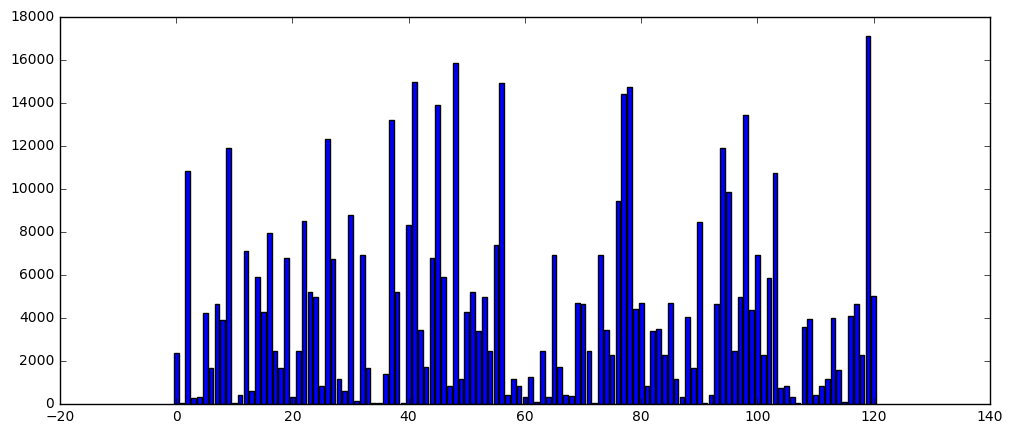

In [14]:
#plots the disease group by topic and year
import matplotlib.pyplot as plt

width = 12
height = 5
plt.figure(figsize=(width, height))

plt.bar(range(len(dicts)), list(dicts.values()), align='center')
#plt.xticks(range(len(dicts)), list(dicts.keys()))
plt.show()

In [18]:
# Load phone usage data from csv file
import pandas as pd
import dateutil


df = pd.read_csv("C:\\Pavans\\JetBrains-Pycharm\\Workspace\\Pandas\\Pandas-1\\datasets_practice\\phone_data.csv", low_memory=False)
# Convert date from string to date times
df['date'] = df['date'].apply(dateutil.parser.parse, dayfirst=True)


In [21]:
# How many rows the dataset
df['item'].count()

830

In [22]:
# What was the longest phone call / data entry?
df['duration'].max()

10528.0

In [23]:
# How many seconds of phone calls are recorded in total?
df['duration'][df['item'] == 'call'].sum()

92321.0

In [25]:
# How many entries are there for each month?
df['month'].value_counts()

2014-11    230
2015-01    205
2014-12    157
2015-02    137
2015-03    101
Name: month, dtype: int64

In [27]:
# Number of non-null unique network entries
df['network'].nunique()

9

In [32]:
#summarizing the data frame using groupby
df.groupby('month').first()

,index,date,time,duration,item,network,network_type
month,,,,,,,
2014-11,0,2014-10-15,6:58,34.429,data,data,data
2014-12,228,2014-11-13,6:58,34.429,data,data,data
2015-01,381,2014-12-13,6:58,34.429,data,data,data
2015-02,577,2015-01-13,6:58,34.429,data,data,data
2015-03,729,2015-02-12,8:15:00,69.000,call,landline,landline


In [34]:
# Get the sum of the durations per month
df.groupby('month')['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [37]:
# Get the number of dates / entries in each month
df.groupby('month')['date'].count()

month
2014-11    230
2014-12    157
2015-01    205
2015-02    137
2015-03    101
Name: date, dtype: int64

In [39]:
# What is the sum of durations, for calls only, to each network
df[df['item'] == 'call'].groupby('network')['duration'].sum()

network
Meteor        7200.0
Tesco        13828.0
Three        36464.0
Vodafone     14621.0
landline     18433.0
voicemail     1775.0
Name: duration, dtype: float64

In [41]:
# How many calls, sms, and data entries are in each month?
df.groupby(['month', 'item'])['date'].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: date, dtype: int64

In [43]:
# How many calls, texts, and data are sent per month, split by network_type
df.groupby(['month', 'network_type'])['date'].count()

month    network_type
2014-11  data             29
         landline          5
         mobile          189
         special           1
         voicemail         6
2014-12  data             30
         landline          7
         mobile          108
         voicemail         8
         world             4
2015-01  data             31
         landline         11
         mobile          160
         voicemail         3
2015-02  data             31
         landline          8
         mobile           90
         special           2
         voicemail         6
2015-03  data             29
         landline         11
         mobile           54
         voicemail         4
         world             3
Name: date, dtype: int64

In [46]:
df.groupby('month', as_index=False).agg({"duration": "sum"})

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [49]:
# Group the data frame by month and item and extract a number of stats from each group
df.groupby(['month', 'item']).agg({'duration':sum,      # find the sum of the durations for each group
                                     'network_type': "count", # find the number of network type entries
                                     'date': 'first'})    # get the first date per group

duration  network_type       date
month   item                                    
2014-11 call  25547.000           107 2014-10-15
        data    998.441            29 2014-10-15
        sms      94.000            94 2014-10-16
2014-12 call  13561.000            79 2014-11-14
        data   1032.870            30 2014-11-13
        sms      48.000            48 2014-11-14
2015-01 call  17070.000            88 2014-12-15
        data   1067.299            31 2014-12-13
        sms      86.000            86 2014-12-15
2015-02 call  14416.000            67 2015-01-15
        data   1067.299            31 2015-01-13
        sms      39.000            39 2015-01-15
2015-03 call  21727.000            47 2015-02-12
        data    998.441            29 2015-02-13
        sms      25.000            25 2015-02-19

In [52]:
# Group the data frame by month and item and extract a number of stats from each group
df.groupby(['month', 'item']).agg({'duration': [min, max, sum],      # find the min, max, and sum of the duration column
    'network_type': "count", # find the number of network type entries
    'date': [min, 'first', 'nunique']})    # get the min, first, and number of unique dates per group

duration                       network_type       date  \
                  min        max        sum        count        min   
month   item                                                          
2014-11 call    1.000   1940.000  25547.000          107 2014-10-15   
        data   34.429     34.429    998.441           29 2014-10-15   
        sms     1.000      1.000     94.000           94 2014-10-16   
2014-12 call    2.000   2120.000  13561.000           79 2014-11-14   
        data   34.429     34.429   1032.870           30 2014-11-13   
        sms     1.000      1.000     48.000           48 2014-11-14   
2015-01 call    2.000   1859.000  17070.000           88 2014-12-15   
        data   34.429     34.429   1067.299           31 2014-12-13   
        sms     1.000      1.000     86.000           86 2014-12-15   
2015-02 call    1.000   1863.000  14416.000           67 2015-01-15   
        data   34.429     34.429   1067.299           31 2015-01-13   
        sms     1.000      1.000     39.000           39 2015-01-15   
2015-03 call    2.000  10528.000  21727.000           47 2015-02-12   
        data   34.429     34.429    998.441           29 2015-02-13   
        sms     1.000      1.000     25.000           25 2015-02-19   

                                 
                  first nunique  
month   item                     
2014-11 call 2014-10-15      28  
        data 2014-10-15      29  
        sms  2014-10-16      17  
2014-12 call 2014-11-14      25  
        data 2014-11-13      30  
        sms  2014-11-14      14  
2015-01 call 2014-12-15      24  
        data 2014-12-13      31  
        sms  2014-12-15      23  
2015-02 call 2015-01-15      24  
        data 2015-01-13      31  
        sms  2015-01-15      12  
2015-03 call 2015-02-12      17  
        data 2015-02-13      29  
        sms  2015-02-19       8